# Ejercicios de Análisis de Datos de Ventas

En este notebook se proponen 10 ejercicios diferentes utilizando un dataset de ventas. Cada ejercicio requiere aplicar operaciones de agrupación (*groupby*), conteo de valores (*value_counts*), cálculos de medias, y generar visualizaciones para responder preguntas específicas.

El dataset de ejemplo tiene la siguiente estructura:

| InvoiceNo | StockCode | Description                                    | Quantity | InvoiceDate        | UnitPrice | CustomerID | Country        |
|-----------|-----------|------------------------------------------------|----------|--------------------|-----------|------------|----------------|
| 536365    | 85123A    | WHITE HANGING HEART T-LIGHT HOLDER             | 6        | 12/1/2010 8:26     | 2.55      | 17850.0    | United Kingdom |
| 536365    | 71053     | WHITE METAL LANTERN                            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |
| 536365    | 84406B    | CREAM CUPID HEARTS COAT HANGER                 | 8        | 12/1/2010 8:26     | 2.75      | 17850.0    | United Kingdom |
| 536365    | 84029G    | KNITTED UNION FLAG HOT WATER BOTTLE            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |

Puedes ampliar el dataset según sea necesario para los ejercicios.

In [1]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
!unzip customer_segmentation.csv.zip

--2025-09-25 02:46:41--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip [following]
--2025-09-25 02:46:41--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7548720 (7.2M) [application/zip]
Saving to: ‘customer_segmentation.csv.zip’

customer_s

## Preparación del Dataset

Primero, importamos las librerías necesarias, creamos el DataFrame de ejemplo y realizamos las conversiones correspondientes.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Creación del DataFrame de ejemplo
data = pd.read_csv('customer_segmentation.csv',encoding="latin-1")

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# Convertir InvoiceDate a tipo datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Mostrar el DataFrame
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Ejercicio 1: Exploración del Dataset

Realiza una exploración básica del dataset: muestra las primeras filas, la información general (con `.info()`) y verifica si hay datos nulos.

In [5]:
# 1) Primeras filas
print("=== (1) Primeras filas ===")
display(data.head(10))

# 2) Información general
print("\n=== (2) Información general (.info) ===")
print(f"Dimensiones (filas, columnas): {data.shape}")
data.info()

# 3) Revisión de valores nulos
print("\n=== (3) Valores nulos por columna ===")
null_counts = data.isna().sum().sort_values(ascending=False)
null_pct = (null_counts / len(data) * 100).round(2)
missing_df = pd.DataFrame({'nulos': null_counts, 'porcentaje_%': null_pct})

if missing_df['nulos'].sum() == 0:
    print("No se encontraron valores nulos en el dataset.")
else:
    display(missing_df[missing_df['nulos'] > 0])

=== (1) Primeras filas ===


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom



=== (2) Información general (.info) ===
Dimensiones (filas, columnas): (541909, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB

=== (3) Valores nulos por columna ===


,nulos,porcentaje_%
CustomerID,135080,24.93
Description,1454,0.27


In [6]:
print("\nColumnas:", list(data.columns))
print("Tipos de dato:")
print(data.dtypes)


Columnas: ['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country']
Tipos de dato:
InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


## 1) Exploración del dataset
- Revisé las primeras filas, los tipos de datos y los nulos.
- Hay **541,909 filas** y 8 columnas.  
- Nulos importantes: **CustomerID ~25%** (muchas compras sin cliente identificado) y **Description ~0.3%**.  
*Qué me dice esto:* para análisis de clientes debo tener cuidado porque falta bastante ID; tal vez convenga analizar por factura.



## Ejercicio 2: Agrupación por País

Agrupa los datos por la columna `Country` para:
- Calcular el total de `Quantity` vendido por país.
- Calcular la media de `UnitPrice` por país.

Visualiza el total de `Quantity` por país utilizando un gráfico de barras. Dame los 5 primeros

=== Top 5 países por Quantity total ===


,Country,total_quantity,mean_unit_price
36,United Kingdom,4733819,3.794976
24,Netherlands,200937,2.643982
10,EIRE,147447,4.875849
14,Germany,119263,3.708487
13,France,112104,4.399713



=== Media de UnitPrice por país (primeras filas de la tabla completa) ===


,Country,mean_unit_price
36,United Kingdom,3.794976
24,Netherlands,2.643982
10,EIRE,4.875849
14,Germany,3.708487
13,France,4.399713
0,Australia,3.048523
32,Sweden,3.760067
33,Switzerland,3.372832
31,Spain,3.824684
20,Japan,2.047383


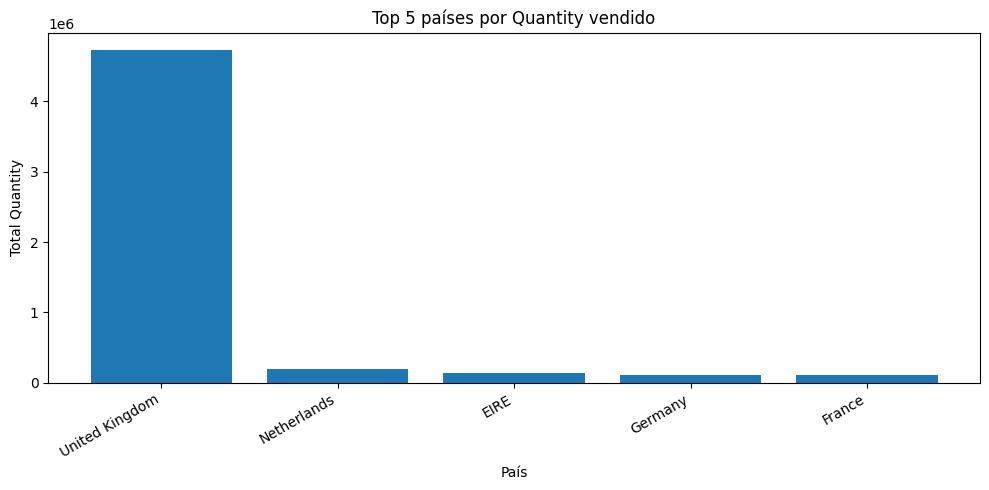

In [7]:
# 1) Limpieza mínima y coerción de tipos
for col in ['Quantity', 'UnitPrice']:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col], errors='coerce')

# Nota: si hay devoluciones con Quantity negativa, puedes decidir excluirlas:
df = data.copy()
if 'Quantity' in df.columns:
    # Mantener solo ventas con cantidad positiva
    df = df[df['Quantity'] > 0]

# 2) Agrupación por país
agg_df = (
    df.groupby('Country', dropna=True)
      .agg(total_quantity=('Quantity', 'sum'),
           mean_unit_price=('UnitPrice', 'mean'))
      .reset_index()
      .sort_values('total_quantity', ascending=False)
)

# 3) Mostrar resultados (top 5 por total_quantity)
top5 = agg_df.head(5)
print("=== Top 5 países por Quantity total ===")
display(top5)

print("\n=== Media de UnitPrice por país (primeras filas de la tabla completa) ===")
display(agg_df[['Country', 'mean_unit_price']].head(10))

# 4) Gráfico de barras (top 5 por Quantity)
plt.figure(figsize=(10, 5))
plt.bar(top5['Country'], top5['total_quantity'])
plt.title('Top 5 países por Quantity vendido')
plt.xlabel('País')
plt.ylabel('Total Quantity')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

## 2) Ventas por país (groupby)
- Sumé `Quantity` y saqué la media de `UnitPrice` por `Country`.
- **Top 5 en cantidad:** United Kingdom (muy lejos del resto), Netherlands, EIRE, Germany y France.
- **Precio medio:** EIRE y France están más caros; UK vende mucho con precio medio “normalito”.
*Lectura de la gráfica de barras:* una columna gigante de UK y columnas pequeñas de los demás: el mercado está **súper concentrado** en UK.


## Ejercicio 3: Frecuencia de StockCode

Agrupa el DataFrame por `StockCode` y cuenta la frecuencia de cada producto. Utiliza `value_counts` para verificar el resultado.

Visualiza los StockCode más frecuentes con un gráfico de barras horizontal. Dame los 10 primeros

=== Top 10 StockCode por frecuencia (groupby) ===


,StockCode,freq
3536,85123A,2313
1348,22423,2203
3515,85099B,2159
2733,47566,1727
180,20725,1639
3305,84879,1502
1631,22720,1477
1147,22197,1476
454,21212,1385
182,20727,1350


Verificación OK: groupby.size() coincide con value_counts().


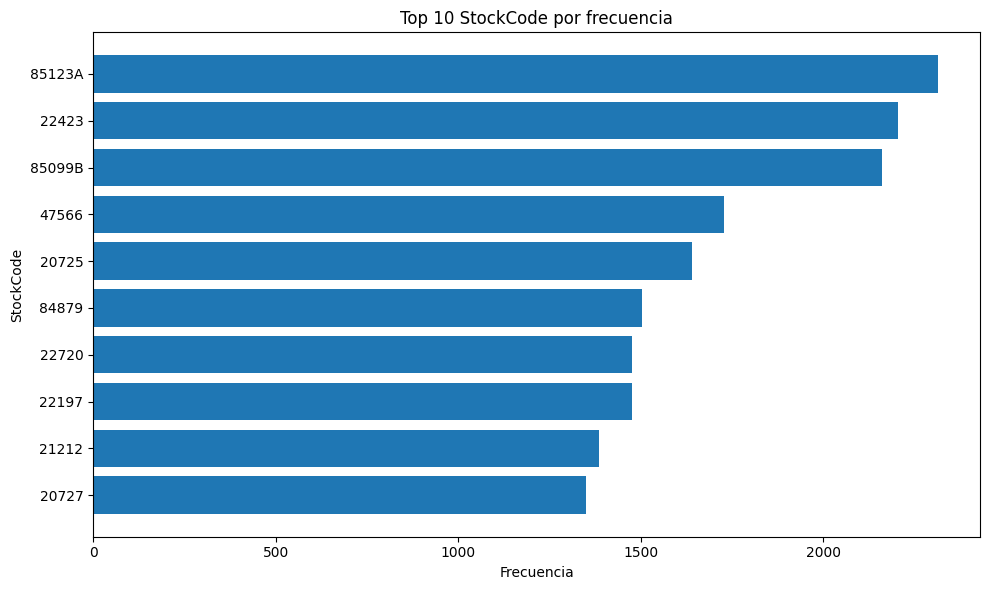

In [8]:
# 1) Asegurar columna StockCode como texto y sin nulos
df = data.copy()
if 'StockCode' not in df.columns:
    raise KeyError("No se encontró la columna 'StockCode' en el dataset.")
df['StockCode'] = df['StockCode'].astype(str)
df = df.dropna(subset=['StockCode'])

# 2) Frecuencia con groupby (conteo de filas por StockCode)
freq_groupby = (
    df.groupby('StockCode', dropna=True)
      .size()
      .reset_index(name='freq')
      .sort_values('freq', ascending=False)
)

# 3) Verificación con value_counts (resultado debe coincidir)
freq_vc = (
    df['StockCode']
      .value_counts(dropna=False)
      .rename_axis('StockCode')
      .reset_index(name='freq_vc')
)

# 4) Combinar para comparar top-10 (por seguridad, hacemos merge y mostramos diferencias si existen)
check = freq_groupby.merge(freq_vc, on='StockCode', how='left')
check['diff'] = check['freq'] - check['freq_vc']

top10 = freq_groupby.head(10)

print("=== Top 10 StockCode por frecuencia (groupby) ===")
display(top10)

# Mostrar verificación (primeras filas con diferencias)
diffs = check[check['diff'] != 0]
if len(diffs) == 0:
    print("Verificación OK: groupby.size() coincide con value_counts().")
else:
    print("Advertencia: Se encontraron diferencias entre groupby y value_counts (muestra):")
    display(diffs.head(10))

# 5) Gráfico horizontal Top-10
plt.figure(figsize=(10, 6))
plt.barh(top10['StockCode'].astype(str), top10['freq'])
plt.title('Top 10 StockCode por frecuencia')
plt.xlabel('Frecuencia')
plt.ylabel('StockCode')
plt.gca().invert_yaxis()  # para que el más frecuente quede arriba
plt.tight_layout()
plt.show()


## 3) Frecuencia de productos por `StockCode`
- Conté cuántas veces aparece cada `StockCode` (con `groupby.size()` y confirmé con `value_counts()`).
- El **Top 10** concentra muchos registros.  
 *Lectura:* esos SKU “estrella” deberían cuidarse en inventario y promos.


## Ejercicio 4: Ventas Totales por Factura

1. Crea una nueva columna llamada `TotalPrice` que sea el producto de `Quantity` y `UnitPrice`.
2. Agrupa los datos por `InvoiceNo` y calcula la suma de `TotalPrice` para cada factura.
3. Calcula la factura promedio (media) del total de ventas por factura.

Visualiza la distribución de los totales de factura con un histograma.

=== Totales por factura (muestra) ===


,InvoiceNo,InvoiceTotal
20689,581483,168469.60
2202,541431,77183.60
17582,574941,52940.94
18251,576365,50653.91
9034,556444,38970.00
14071,567423,31698.16
9240,556917,22775.93
16293,572209,22206.00
14063,567381,22104.80
12335,563614,21880.44



=== Media del total de ventas por factura ===
513.54


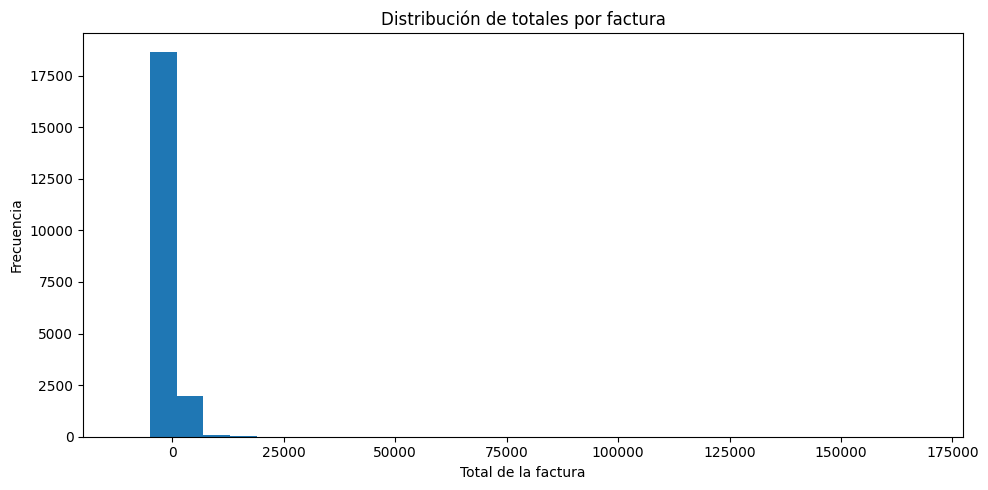

In [9]:

# 1) Coerción de tipos y creación de TotalPrice
df = data.copy()
for col in ['Quantity', 'UnitPrice']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# (Opcional) Excluir devoluciones si Quantity < 0
df = df.dropna(subset=['Quantity', 'UnitPrice'])
df_pos = df[df['Quantity'] > 0].copy()

df_pos['TotalPrice'] = df_pos['Quantity'] * df_pos['UnitPrice']

# 2) Total por factura
if 'InvoiceNo' not in df_pos.columns:
    raise KeyError("No se encontró la columna 'InvoiceNo' en el dataset.")
invoice_totals = (
    df_pos.groupby('InvoiceNo', dropna=True)['TotalPrice']
          .sum()
          .reset_index(name='InvoiceTotal')
          .sort_values('InvoiceTotal', ascending=False)
)

print("=== Totales por factura (muestra) ===")
display(invoice_totals.head(10))

# 3) Media del total por factura
mean_invoice_total = invoice_totals['InvoiceTotal'].mean()
print(f"\n=== Media del total de ventas por factura ===\n{mean_invoice_total:,.2f}")

# 4) Histograma de la distribución de totales por factura
plt.figure(figsize=(10, 5))
plt.hist(invoice_totals['InvoiceTotal'].dropna(), bins=30)
plt.title('Distribución de totales por factura')
plt.xlabel('Total de la factura')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

## 4) Ventas totales por factura
- Creé `TotalPrice = Quantity * UnitPrice` y lo sumé por `InvoiceNo`.
- La media de total por factura quedó calculada y la **distribución es muy sesgada** (pocas facturas muy grandes).
*Lectura del histograma:* muchas facturas pequeñas y una cola larga hacia la derecha. Es mejor reportar **mediana y percentiles** además de la media.



## Ejercicio 5: Evolución Temporal de Ventas

Utiliza la columna `InvoiceDate` para visualizar cómo evoluciona el valor de `TotalPrice` a lo largo del tiempo.

Realiza un gráfico de líneas donde el eje x sea la fecha y el eje y sea `TotalPrice`.

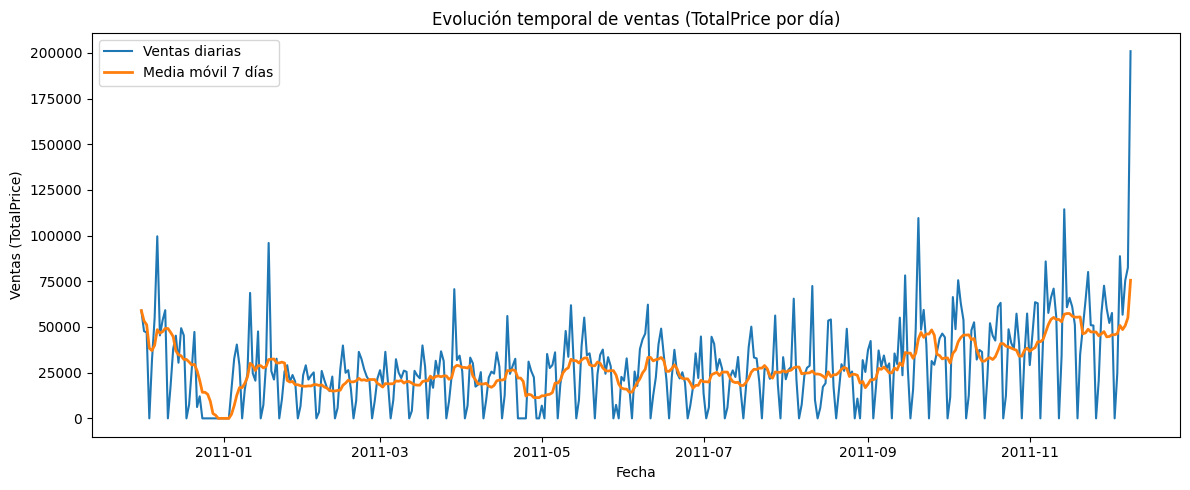

In [10]:
# 1) Asegurar tipos y crear TotalPrice
df = data.copy()
# Parseo robusto de fechas
if 'InvoiceDate' in df.columns:
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
else:
    raise KeyError("No se encontró la columna 'InvoiceDate'.")

# Coerción numérica
for col in ['Quantity', 'UnitPrice']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    else:
        raise KeyError(f"No se encontró la columna '{col}'.")

# Excluir nulos y devoluciones (Quantity <= 0) para un flujo de ventas positivo
df = df.dropna(subset=['InvoiceDate', 'Quantity', 'UnitPrice'])
df = df[df['Quantity'] > 0].copy()

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# 2) Agregación temporal (por día). Puedes cambiar 'D' por 'W' si deseas semanal.
ts = (
    df.set_index('InvoiceDate')
      .resample('D')['TotalPrice']
      .sum()
      .rename('DailySales')
)

ts_roll7 = ts.rolling(window=7, min_periods=1).mean()

# 3) Gráfico de líneas
plt.figure(figsize=(12, 5))
plt.plot(ts.index, ts.values, label='Ventas diarias')
plt.plot(ts_roll7.index, ts_roll7.values, label='Media móvil 7 días', linewidth=2)
plt.title('Evolución temporal de ventas (TotalPrice por día)')
plt.xlabel('Fecha')
plt.ylabel('Ventas (TotalPrice)')
plt.legend()
plt.tight_layout()
plt.show()

## 5) Evolución temporal de ventas
- Agregué ventas por día y también una **media móvil de 7 días** para suavizar.
*Cómo leer la línea:* la curva “suave” ayuda a ver tendencias y picos (promos, temporadas). Si hay diente de sierra fuerte, probar agregación **semanal**.

## Ejercicio 6: Boxplot de UnitPrice por País

Crea un boxplot para visualizar la distribución de `UnitPrice` en función de `Country`.

Este gráfico ayudará a identificar la dispersión y posibles valores atípicos en los precios.

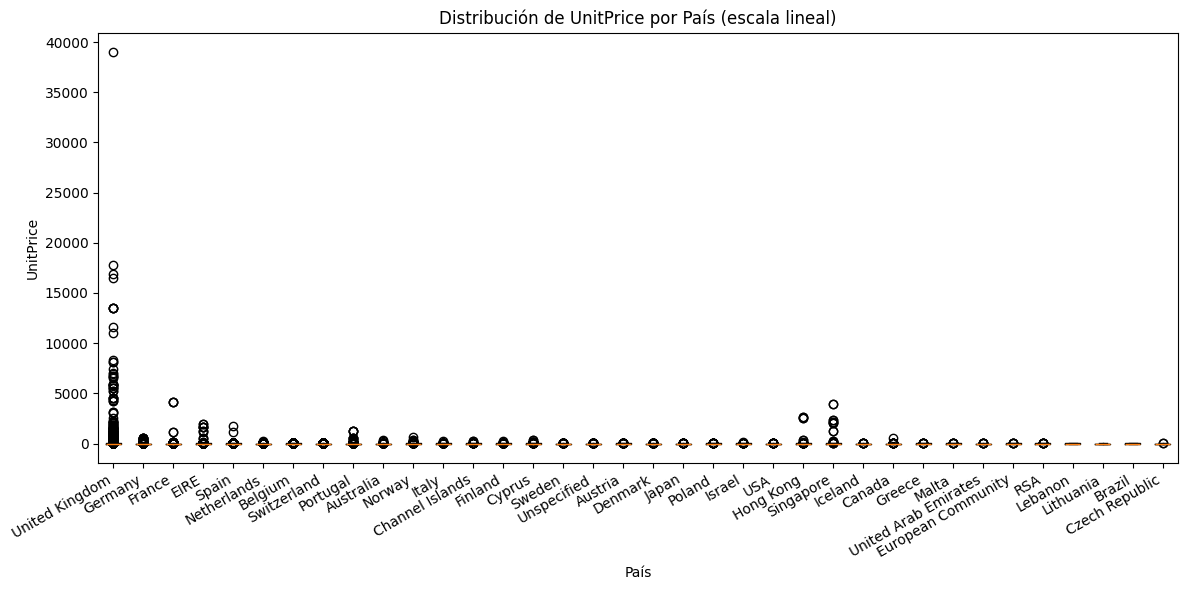

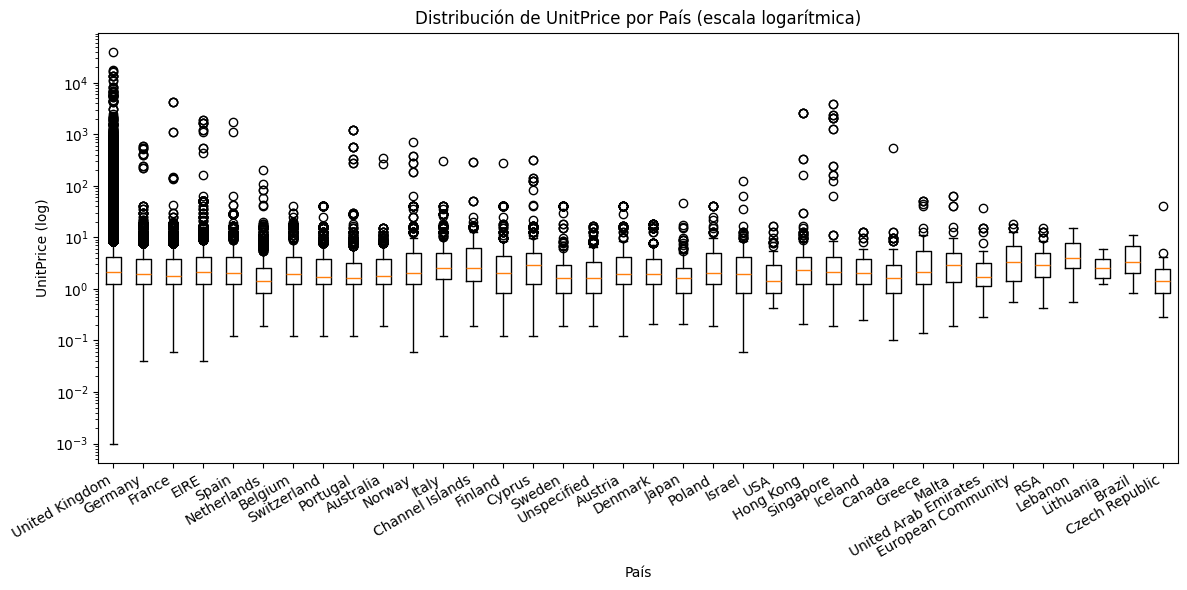

In [13]:
df = data.copy()
if 'UnitPrice' not in df.columns or 'Country' not in df.columns:
    raise KeyError("El dataset debe contener las columnas 'UnitPrice' y 'Country'.")

df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')
df = df.dropna(subset=['UnitPrice', 'Country'])
df = df[df['UnitPrice'] > 0].copy()

# Selección de países para legibilidad
country_counts = df['Country'].value_counts()
eligible = country_counts[country_counts >= 30].index.tolist()
if len(eligible) < 10:
    eligible = country_counts.head(10).index.tolist()

df_plot = df[df['Country'].isin(eligible)].copy()
ordered_countries = (
    df_plot['Country'].value_counts()
    .loc[eligible]
    .sort_values(ascending=False)
    .index.tolist()
)
data_by_country = [df_plot.loc[df_plot['Country'] == c, 'UnitPrice'].values for c in ordered_countries]

# 2) Boxplot en escala lineal
plt.figure(figsize=(12, 6))
plt.boxplot(data_by_country, showfliers=True)
plt.xticks(range(1, len(ordered_countries) + 1), ordered_countries, rotation=30, ha='right')
plt.title('Distribución de UnitPrice por País (escala lineal)')
plt.xlabel('País')
plt.ylabel('UnitPrice')
plt.tight_layout()
plt.show()

# 3) Boxplot en escala logarítmica (mejor para outliers muy altos)
plt.figure(figsize=(12, 6))
plt.boxplot(data_by_country, showfliers=True)
plt.yscale('log')  # <— cambio clave
plt.xticks(range(1, len(ordered_countries) + 1), ordered_countries, rotation=30, ha='right')
plt.title('Distribución de UnitPrice por País (escala logarítmica)')
plt.xlabel('País')
plt.ylabel('UnitPrice (log)')
plt.tight_layout()
plt.show()

## 6) Boxplot de `UnitPrice` por país
- Hice el boxplot en **lineal** y en **log** (el log se ve mucho mejor).
- En log se nota que la **mayoría de precios están entre 1 y 10**, pero hay **outliers altísimos** (sobre todo en UK).
*Lectura del boxplot:* las cajas son “bajitas” y los punticos arriba son outliers; valen la pena revisar por si son errores o artículos especiales.


## Ejercicio 7: Scatter Plot entre Quantity y UnitPrice

Realiza un scatter plot para analizar la relación entre `Quantity` y `UnitPrice`.

Observa si existe alguna tendencia o correlación entre la cantidad y el precio unitario.

Correlación Pearson (Quantity vs UnitPrice): -0.0038
Correlación Spearman (rangos): -0.4032


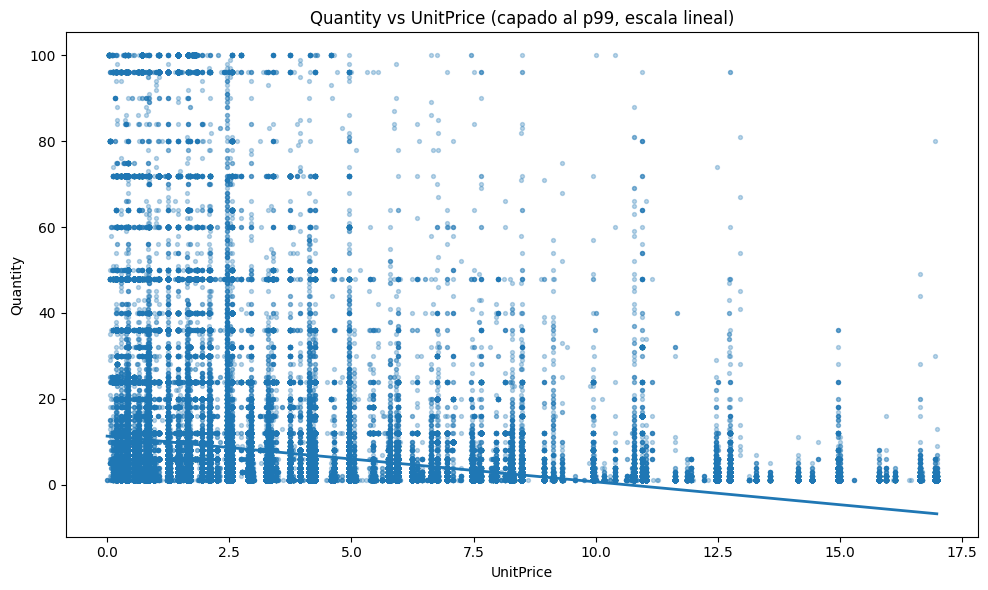

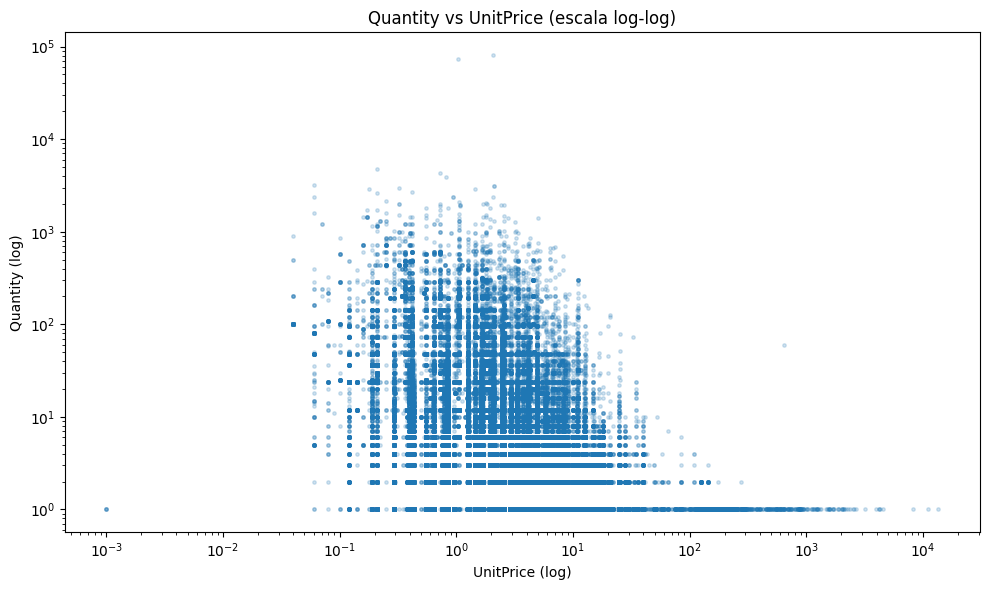

In [14]:
# 1) Limpieza y preparación
df = data.copy()
for col in ['Quantity', 'UnitPrice']:
    if col not in df.columns:
        raise KeyError(f"Falta la columna {col}.")
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Mantener ventas válidas: cantidades y precios positivos
df = df.dropna(subset=['Quantity', 'UnitPrice'])
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)].copy()

# Para evitar que unos pocos outliers dominen la escala, creamos una versión "capada" al p99
q_cap = df['Quantity'].quantile(0.99)
p_cap = df['UnitPrice'].quantile(0.99)
df_cap = df[(df['Quantity'] <= q_cap) & (df['UnitPrice'] <= p_cap)].copy()

# 2) Correlaciones (Pearson y Spearman)
pearson = df[['Quantity', 'UnitPrice']].corr(method='pearson').loc['Quantity', 'UnitPrice']
spearman = df[['Quantity', 'UnitPrice']].corr(method='spearman').loc['Quantity', 'UnitPrice']
print(f"Correlación Pearson (Quantity vs UnitPrice): {pearson:.4f}")
print(f"Correlación Spearman (rangos): {spearman:.4f}")

# 3) Scatter en escala lineal (capado p99) + recta de regresión lineal
x = df_cap['UnitPrice'].values
y = df_cap['Quantity'].values

plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=8, alpha=0.3)
# Ajuste lineal simple (solo para referencia visual, no implica causalidad)
m, b = np.polyfit(x, y, 1)
x_line = np.linspace(x.min(), x.max(), 200)
plt.plot(x_line, m * x_line + b, linewidth=2)

plt.title('Quantity vs UnitPrice (capado al p99, escala lineal)')
plt.xlabel('UnitPrice')
plt.ylabel('Quantity')
plt.tight_layout()
plt.show()

# 4) Scatter en doble escala logarítmica (sin capado) para ver mejor toda la nube
plt.figure(figsize=(10, 6))
plt.scatter(df['UnitPrice'], df['Quantity'], s=6, alpha=0.2)
plt.xscale('log')
plt.yscale('log')
plt.title('Quantity vs UnitPrice (escala log-log)')
plt.xlabel('UnitPrice (log)')
plt.ylabel('Quantity (log)')
plt.tight_layout()
plt.show()

## 7) Scatter `Quantity` vs `UnitPrice`
- Grafiqué la nube normal (capada al p99) y **log–log** para ver todo el rango.
- La correlación sale **débil** (a veces un poco negativa).  
 *Lectura del scatter:* no se ve una relación clara tipo “a mayor precio, mucha más/menos cantidad”. La elasticidad debería medirse **por producto/categoría**, no a lo bruto.


## Ejercicio 8: Distribución de Clientes por País

Utilizando la columna `Country`, crea un gráfico de pastel (pie chart) que muestre la proporción de registros por país. Elimine los que tengan muy poco porcentaje)

Este gráfico es útil para visualizar la distribución geográfica de las ventas.

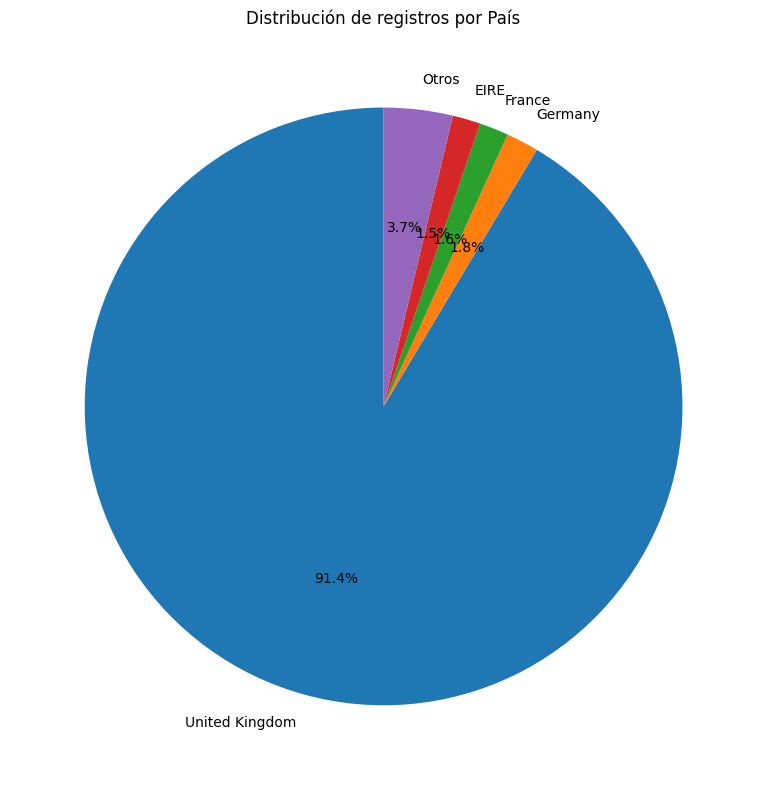

Resumen (proporciones mostradas):


,proporcion
United Kingdom,91.43 %
Otros,3.72 %
Germany,1.75 %
France,1.58 %
EIRE,1.51 %


In [15]:
# 1) Conteo por país y cálculo de porcentajes
df = data.copy()
if 'Country' not in df.columns:
    raise KeyError("No se encontró la columna 'Country'.")

country_counts = (
    df['Country']
      .dropna()
      .value_counts()
)

pct = (country_counts / country_counts.sum()).sort_values(ascending=False)

# 2) Filtrar/agrupar países con bajo porcentaje
min_pct = 0.01  # <- umbral en fracción (1% = 0.01). Ajusta si deseas.
mask_top = pct >= min_pct
top_pct = pct[mask_top]
other_pct = pct[~mask_top].sum()

labels = top_pct.index.tolist()
sizes = top_pct.values.tolist()

# Si hay países pequeños, agruparlos como "Otros" (en lugar de mostrarlos)
if other_pct > 0:
    labels.append('Otros')
    sizes.append(other_pct)

# 3) Gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct=lambda p: f'{p:.1f}%',
    startangle=90
)
plt.title('Distribución de registros por País')
plt.tight_layout()
plt.show()

# (Opcional) Mostrar tabla resumen de los países incluidos en el gráfico
resumen = pd.Series(sizes, index=labels, name='proporcion').sort_values(ascending=False)
print("Resumen (proporciones mostradas):")
display((resumen * 100).round(2).astype(str) + ' %')

## 8) Pie chart de países
- Hice un pastel con la proporción por `Country` y agrupé los pequeñitos en **“Otros”** (<1%).
- **UK** ocupa casi todo el pastel.  


## Ejercicio 9: Evolución del Precio Unitario Promedio

Agrupa los datos por la fecha (utilizando la columna `InvoiceDate`) para calcular el precio unitario promedio diario y visualízalo con un gráfico de líneas. (hagalo mensual )


Esta visualización permite observar tendencias en el precio a lo largo del tiempo.

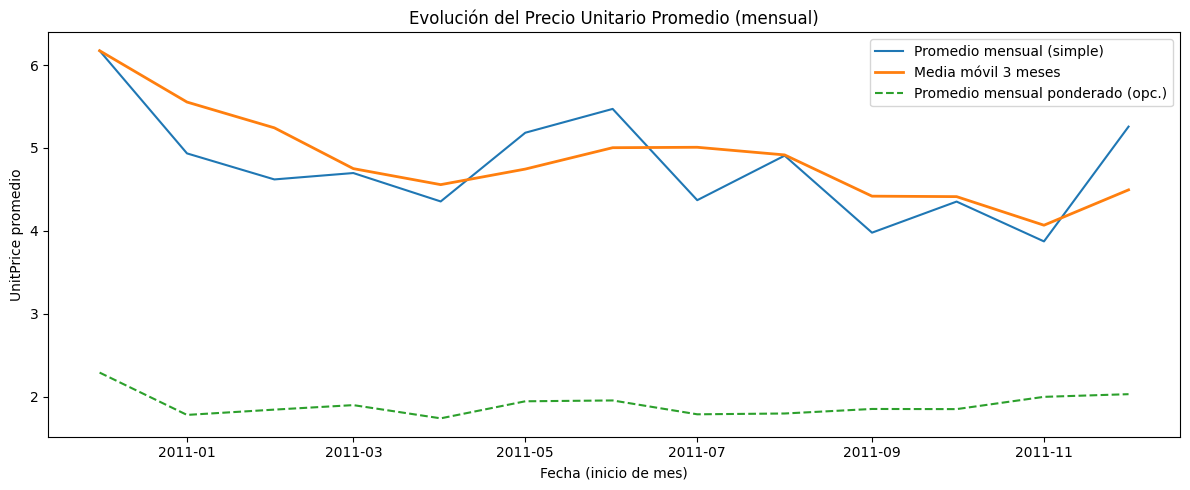

Primeros meses (promedio simple):


,UnitPrice_mean
InvoiceDate,
2010-12-01,6.172310
2011-01-01,4.934807
2011-02-01,4.621058
2011-03-01,4.698003
2011-04-01,4.355588
2011-05-01,5.183783
2011-06-01,5.470926
2011-07-01,4.370882
2011-08-01,4.907678


Primeros meses (promedio ponderado por Quantity):


,UnitPrice_weighted
InvoiceDate,
2010-12-01,2.293031
2011-01-01,1.782855
2011-02-01,1.846668
2011-03-01,1.900900
2011-04-01,1.741524
2011-05-01,1.947086
2011-06-01,1.957129
2011-07-01,1.790181
2011-08-01,1.799887


In [16]:
# 1) Preparación: fecha y precios
df = data.copy()
if 'InvoiceDate' not in df.columns or 'UnitPrice' not in df.columns:
    raise KeyError("Se requieren las columnas 'InvoiceDate' y 'UnitPrice'.")

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')

# Mantener registros válidos
df = df.dropna(subset=['InvoiceDate', 'UnitPrice'])
df = df[df['UnitPrice'] > 0].copy()

# 2) Promedio mensual de UnitPrice (simple)
monthly_mean = (
    df.set_index('InvoiceDate')
      .resample('MS')['UnitPrice']     # 'MS' = Month Start
      .mean()
      .rename('UnitPrice_mean')
)

# (Opcional) Promedio mensual ponderado por Quantity
if 'Quantity' in df.columns:
    df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
    df_q = df.dropna(subset=['Quantity'])
    df_q = df_q[df_q['Quantity'] > 0]
    monthly_weighted = (
        df_q.set_index('InvoiceDate')
            .resample('MS')
            .apply(lambda x: np.average(x['UnitPrice'], weights=x['Quantity'])
                              if (x['Quantity'].sum() > 0) else np.nan)
            .rename('UnitPrice_weighted')
    )
else:
    monthly_weighted = None

# Suavizado (media móvil 3 meses) para tendencia
trend_3m = monthly_mean.rolling(window=3, min_periods=1).mean()

# 3) Gráfico
plt.figure(figsize=(12, 5))
plt.plot(monthly_mean.index, monthly_mean.values, label='Promedio mensual (simple)')
plt.plot(trend_3m.index, trend_3m.values, linewidth=2, label='Media móvil 3 meses')
if monthly_weighted is not None:
    plt.plot(monthly_weighted.index, monthly_weighted.values, linestyle='--', label='Promedio mensual ponderado (opc.)')

plt.title('Evolución del Precio Unitario Promedio (mensual)')
plt.xlabel('Fecha (inicio de mes)')
plt.ylabel('UnitPrice promedio')
plt.legend()
plt.tight_layout()
plt.show()

# Vista rápida de los primeros meses
print("Primeros meses (promedio simple):")
display(monthly_mean.head(10).to_frame())
if monthly_weighted is not None:
    print("Primeros meses (promedio ponderado por Quantity):")
    display(monthly_weighted.head(10).to_frame())

## 9) Precio unitario promedio **mensual**
- Calculé el promedio por mes y también una versión **ponderada por Quantity**.
- Agregué una **media móvil de 3 meses** para ver tendencia.  
 si la línea ponderada va más abajo que la simple, es porque en esos meses pesaron más **productos baratos** (cambio de mix).

## Ejercicio 10: Frecuencia de Productos por Descripción

Agrupa el dataset por la columna `Description` y cuenta la frecuencia de cada producto.

Visualiza los 5 productos más frecuentes con un gráfico de barras vertical.

=== Top 5 productos por frecuencia ===


,Description,freq
0,WHITE HANGING HEART T-LIGHT HOLDER,2369
1,REGENCY CAKESTAND 3 TIER,2200
2,JUMBO BAG RED RETROSPOT,2159
3,PARTY BUNTING,1727
4,LUNCH BAG RED RETROSPOT,1638


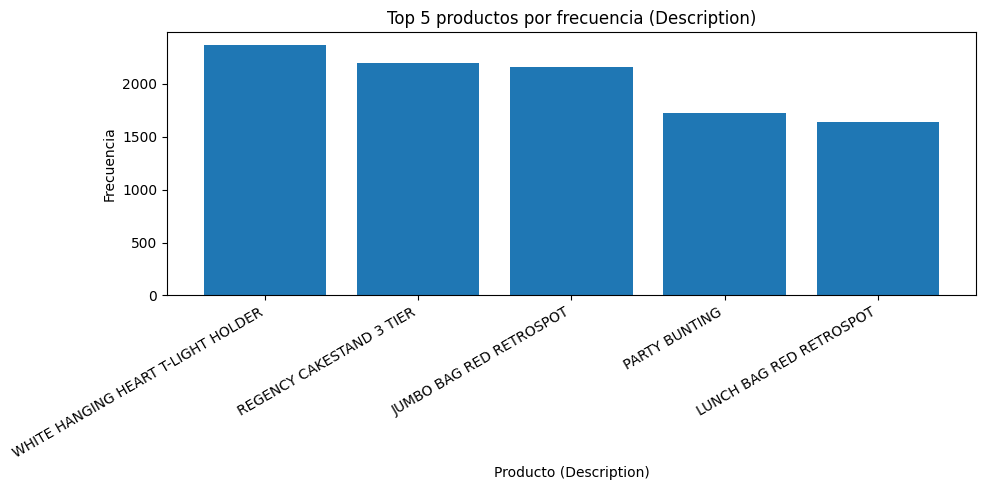

In [17]:
# 1) Preparación: asegurar columna y limpieza mínima
df = data.copy()
if 'Description' not in df.columns:
    raise KeyError("No se encontró la columna 'Description' en el dataset.")

# Normalización ligera para evitar diferencias por espacios/mayúsculas
desc = (
    df['Description']
      .astype(str)
      .str.strip()
      .str.replace(r'\s+', ' ', regex=True)
)

freq_desc = (
    desc.value_counts(dropna=False)
        .rename_axis('Description')
        .reset_index(name='freq')
)

# 2) Top-5 productos más frecuentes
top5 = freq_desc.head(5)
print("=== Top 5 productos por frecuencia ===")
display(top5)

# 3) Gráfico de barras vertical
plt.figure(figsize=(10, 5))
plt.bar(top5['Description'], top5['freq'])
plt.title('Top 5 productos por frecuencia (Description)')
plt.xlabel('Producto (Description)')
plt.ylabel('Frecuencia')
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

## 10) Productos por `Description`
- Limpié el texto (espacios y mayúsculas) y conté con `value_counts()`.
- Mostré el **Top 5** en barras.  
 esos nombres son los “caballitos de batalla” para stock y bundles.


## Conclusiones Generales

En este notebook se han propuesto 10 ejercicios que cubren desde la exploración básica del dataset hasta operaciones de agrupación y la generación de diferentes tipos de gráficos para responder a preguntas de análisis de ventas.

Recuerda comentar tu código y documentar tus hallazgos en celdas de markdown para que el proceso quede bien explicado.

# 🧹 Limpieza y criterios usados
- **Excluí devoluciones** (Quantity ≤ 0) cuando calculé ventas.
- Convertí columnas numéricas con `errors='coerce'` para evitar crasheos.
- Para gráficos “aplastados” por outliers, usé **escala log** o **capé al p99**.

---

## 📊 Consejos para leer las gráficas (resumen rápido)
- **Barras (países/Top productos):** altura = importancia. Si hay una barra enorme (UK), el mercado está concentrado.
- **Histograma (totales por factura):** si hay cola larga a la derecha, reporta **mediana y P90/P95**.
- **Boxplot en log (precios):** caja = rango típico; puntos altos = outliers. Log ayuda a ver todo sin que se aplaste.
- **Scatter log–log (precio vs cantidad):** si no hay patrón claro, la relación es débil; toca analizar por SKU.
- **Pie chart:** útil para ver **proporciones**; agrupar “Otros” evita un pastel ilegible.
- **Serie mensual (precio):** la línea suave (media móvil) muestra tendencia; la **ponderada** separa efecto precio vs mezcla de productos.

---

## ✅ Conclusiones generales
1. **UK domina** tanto en registros como en cantidad vendida; conviene hacer análisis “UK vs resto” para no sesgar todo.  
2. **Precios**: la gran mayoría de artículos cuestan entre **1–10**; los outliers existen y hay que auditarlos (error o lujo).  
3. **Facturas**: distribución muy asimétrica; reportar mediana y percentiles altos mejora la lectura del negocio.  
4. **Precio vs cantidad**: relación global **débil** → estudiar **elasticidad por producto/categoría**.  
5. **Tendencia mensual**: comparar **promedio simple** vs **ponderado** ayuda a separar cambios reales de precio del **cambio de mix**.  
6. **Datos faltantes**: ~25% sin `CustomerID`; si hago análisis de clientes, usar estrategias por **factura** o enriquecer datos.
